## Forecast site traffic using fb Prophet

In [15]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load site data

In [16]:
data_file = "datasets/All-Web-Site-Data-Audience-Overview.xlsx"
df = pd.read_excel(data_file)
df.head()

,Day Index,Sessions
0,2014-09-25,1
1,2014-09-26,4
2,2014-09-27,8
3,2014-09-28,42
4,2014-09-29,233


In [17]:
df.dtypes


Day Index    datetime64[ns]
Sessions              int64
dtype: object

<Figure size 720x576 with 0 Axes>

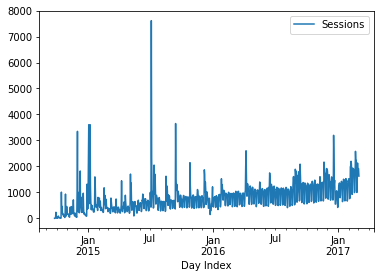

In [18]:
plt.figure(figsize=(10,8))

df.set_index('Day Index').plot();


### Logging session data

In [20]:
#### logging converts multiplicative relationships to additive relationships, and by the same token it converts exponential (compound growth) trends to linear trends.

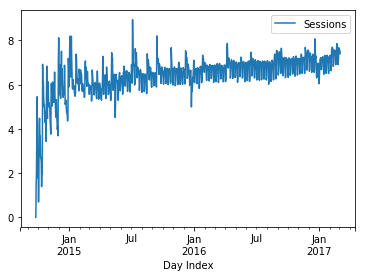

In [19]:
df['Sessions'] = np.log(df['Sessions'])
df.set_index('Day Index').plot();

#### Rename the columns to ds and y in order to comply with the prophet API.

In [21]:
df.columns = ["ds", "y"]
df.head()

,ds,y
0,2014-09-25,0.000000
1,2014-09-26,1.386294
2,2014-09-27,2.079442
3,2014-09-28,3.737670
4,2014-09-29,5.451038


## Make Prediction

In [23]:
# Create Prophet model

m1 = Prophet()
m1.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [24]:
# tell prophet how far to predict in the future, use make_future_dataframe. 
#In this example, we will predict out 1 year (365 days).

future = m1.make_future_dataframe(periods=365)


In [26]:
forecast = m1.predict(future)


In [27]:
#The predicted value is called yhat and the range is defined by yhat_lower and yhat_upper

In [29]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1251,2018-02-27,7.871634,6.675235,9.243095
1252,2018-02-28,7.811661,6.565583,9.039873
1253,2018-03-01,7.780184,6.612327,9.005111
1254,2018-03-02,7.578364,6.351465,8.840400
1255,2018-03-03,7.038727,5.894258,8.302028


### To convert back to the numerical values representing sessions, use np.exp

In [31]:
np.exp(forecast[['yhat', 'yhat_lower', 'yhat_upper']].tail())


,yhat,yhat_lower,yhat_upper
1251,2621.845901,792.533779,10332.968955
1252,2469.227894,710.225761,8432.710232
1253,2392.713927,744.213108,8144.605076
1254,1955.426327,573.332140,6907.751841
1255,1139.935657,362.947602,4032.039320


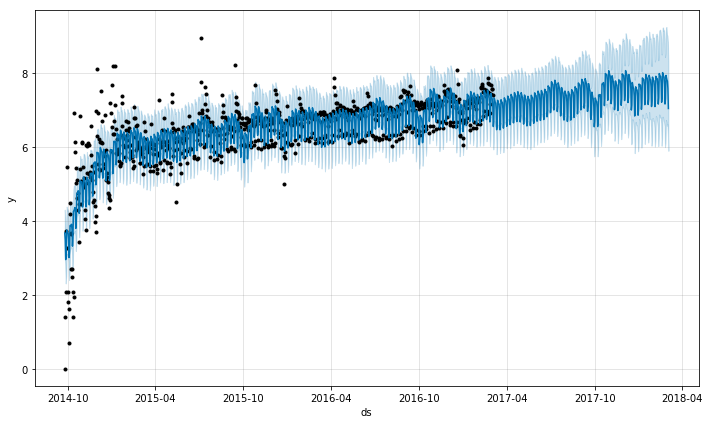

In [32]:
m1.plot(forecast);


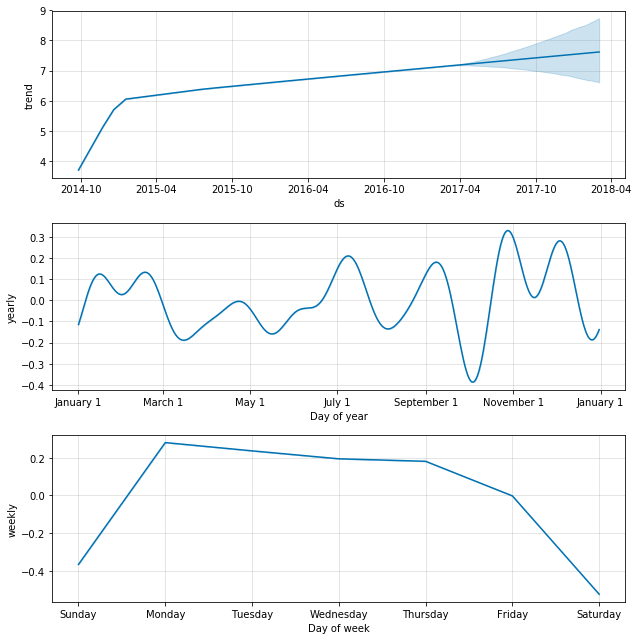

In [33]:
m1.plot_components(forecast);